In [9]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Data Loading

df = pd.read_csv("../dataset/Final_Marks_Data.csv")           

## EDA (Exploratory data analysis)

In [11]:
df.head()

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66


In [12]:
df.shape

(2000, 7)

In [13]:
df.columns

Index(['Student_ID', 'Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Student_ID                     2000 non-null   object
 1   Attendance (%)                 2000 non-null   int64 
 2   Internal Test 1 (out of 40)    2000 non-null   int64 
 3   Internal Test 2 (out of 40)    2000 non-null   int64 
 4   Assignment Score (out of 10)   2000 non-null   int64 
 5   Daily Study Hours              2000 non-null   int64 
 6   Final Exam Marks (out of 100)  2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


In [15]:
# Basic summary of numerical data (Or Descripted stats)

df.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000


In [16]:
# Fetching Duplicate value

df.duplicated().sum()

0

#### Basic Visualizition for data undersatnding

In [17]:
# Histogram for visualize the frequency distribution of numerical data

def plotting(var,num):
    plt.subplot(3,2,num)
    sns.histplot(df[var],kde = True)

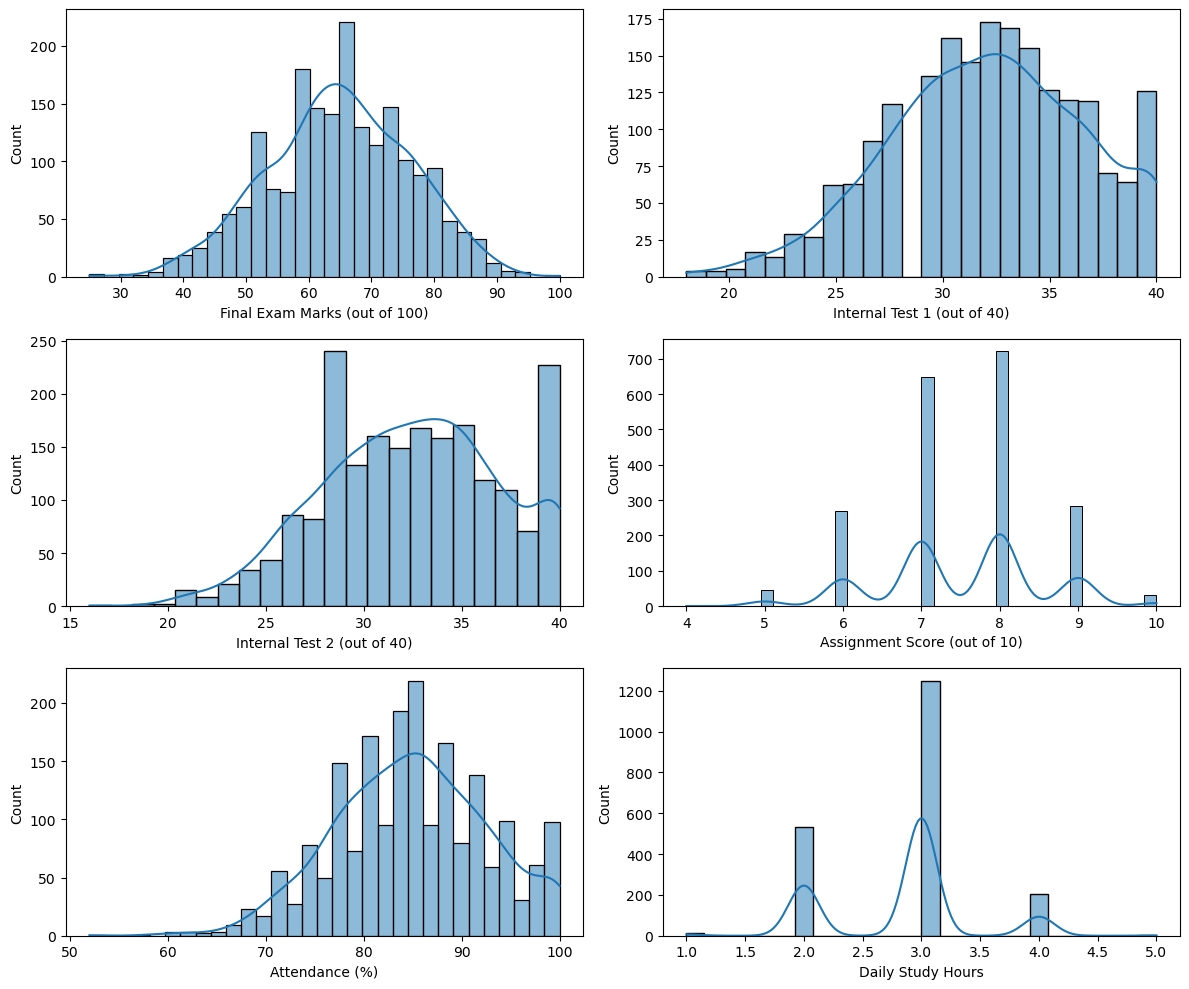

In [18]:
plt.figure(figsize = (12,10))

plotting('Final Exam Marks (out of 100)',1)
plotting('Internal Test 1 (out of 40)',2)
plotting('Internal Test 2 (out of 40)',3)
plotting('Assignment Score (out of 10)',4)
plotting('Attendance (%)',5)
plotting('Daily Study Hours',6)
plt.tight_layout()

In [19]:
df['Daily Study Hours'].skew()

-0.03508936700036764

Distribution type

Final Exam Marks	 -       Normal

Internal Test 1 (40)  -  	Left-skewed (ceiling effect)

Internal Test 2 (40)  -  	Left-skewed (ceiling effect)

Assignment Score	-        Discrete / Multi-modal

Attendance (%)	   -         Left-skewed

Daily Study Hours  -      	Approximately symmetric / normal

In [20]:
# Box plot to visualize the distribution, median, spread, and outliers of numerical data

def box_plotting(var, num):
    plt.subplot(3, 2, num)
    sns.boxplot(x=df[var])
    plt.title(var)


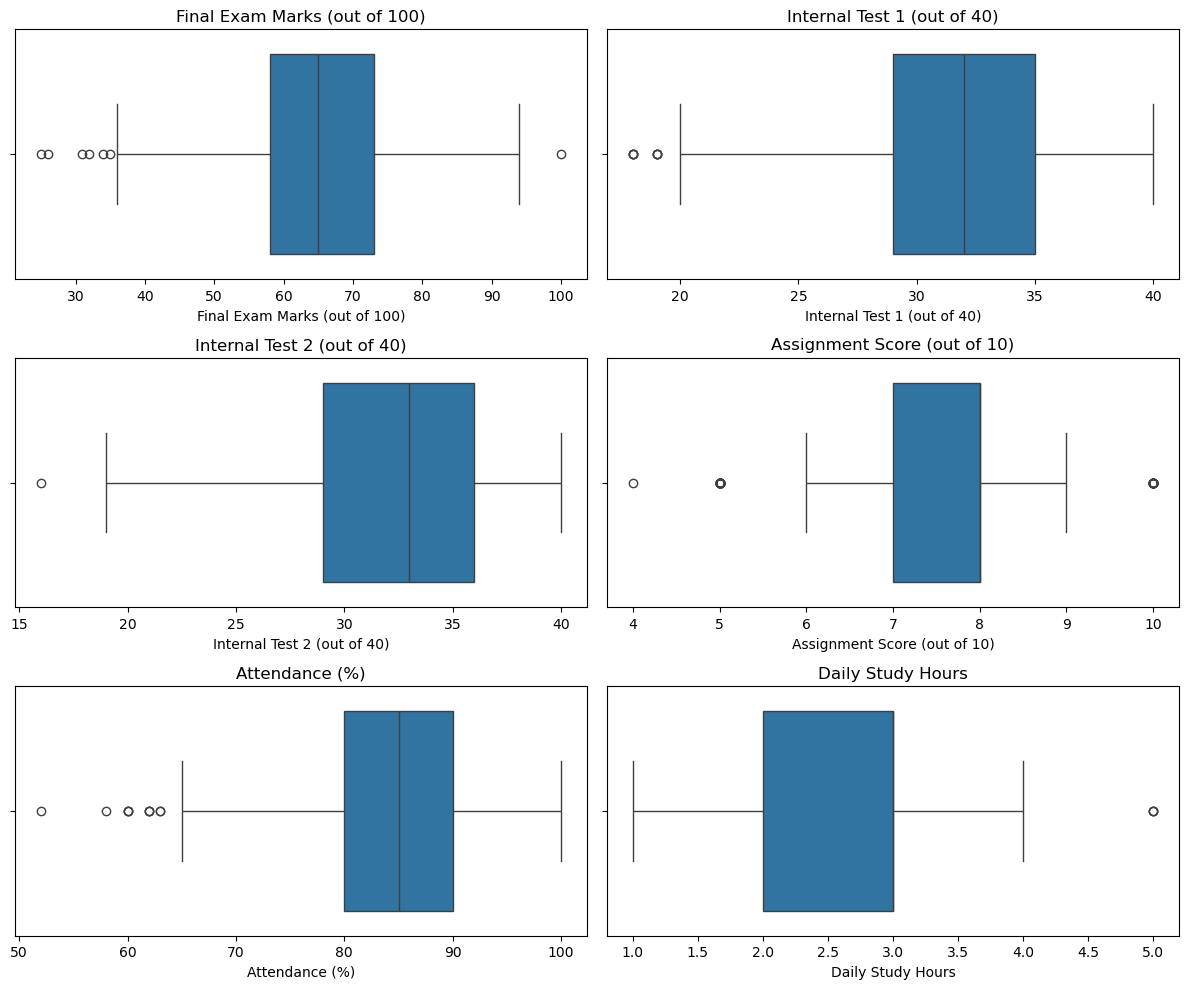

In [21]:
plt.figure(figsize=(12, 10))

box_plotting('Final Exam Marks (out of 100)', 1)
box_plotting('Internal Test 1 (out of 40)', 2)
box_plotting('Internal Test 2 (out of 40)', 3)
box_plotting('Assignment Score (out of 10)', 4)
box_plotting('Attendance (%)', 5)
box_plotting('Daily Study Hours', 6)

plt.tight_layout()

The data is almost cleaned as you can see there is very less outliers which are negligible

<Axes: >

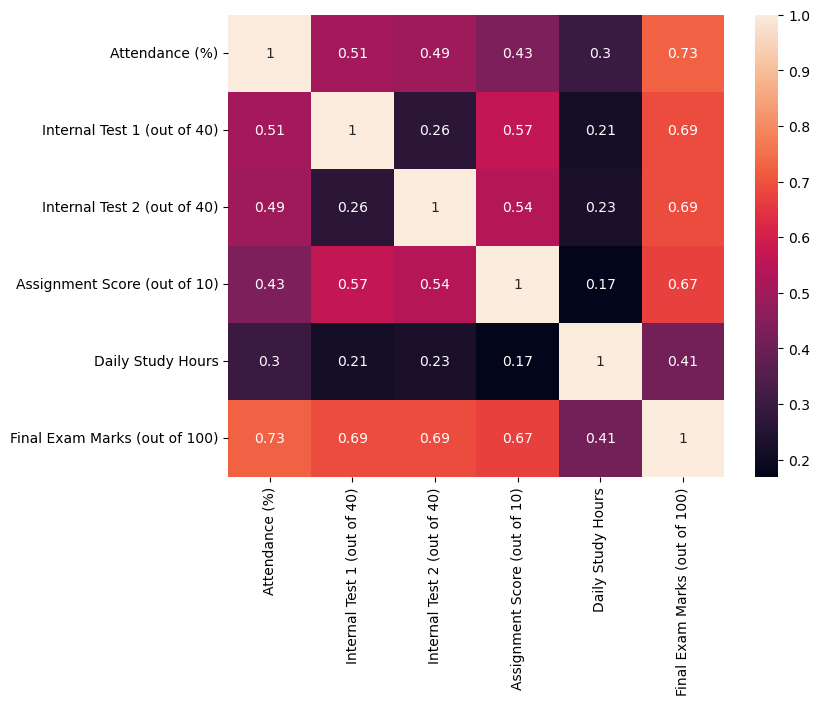

In [22]:
# Heatmap visuals shows the relationship between the one variabe to others

plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only = True),annot =True)

#### Since the dataset does not provide exam completion time, but the project requires analyzing completion time vs performance, a completion time variable is required. Therefore, a realistic exam completion time is simulated.

In [23]:
np.random.seed(42)   # reproductibility ke liye 
df['Exam_Completion_Time(minutes)'] = np.random.randint(
    low = 90,   # minimum minutes
    high = 180, # maximum minutes
    size = len(df)
)

In [24]:
df.head()

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Exam_Completion_Time(minutes)
0,S1000,84,30,36,7,3,72,141
1,S1001,91,24,38,6,3,56,104
2,S1002,73,29,26,7,3,56,161
3,S1003,80,36,35,7,3,74,150
4,S1004,84,31,37,8,3,66,110


In [25]:
df[['Final Exam Marks (out of 100)','Exam_Completion_Time(minutes)']].describe()

,Final Exam Marks (out of 100),Exam_Completion_Time(minutes)
count,2000.000000,2000.00000
mean,64.855000,133.43900
std,11.341265,26.05294
min,25.000000,90.00000
25%,58.000000,111.00000
50%,65.000000,133.00000
75%,73.000000,155.00000
max,100.000000,179.00000


<Axes: xlabel='Exam_Completion_Time(minutes)', ylabel='Count'>

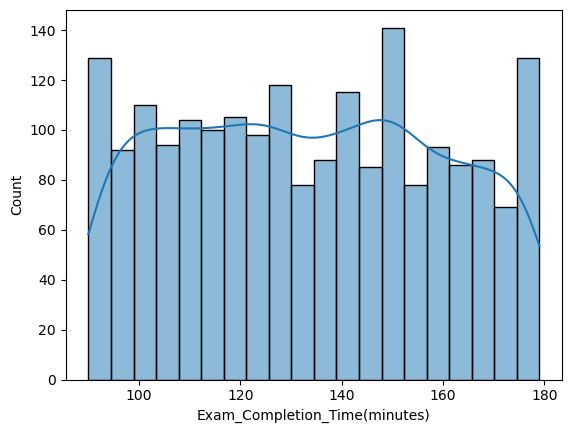

In [26]:
 sns.histplot(df['Exam_Completion_Time(minutes)'],kde = True, bins = 20)

Distribution type - Uniform distribution

<Axes: xlabel='Exam_Completion_Time(minutes)'>

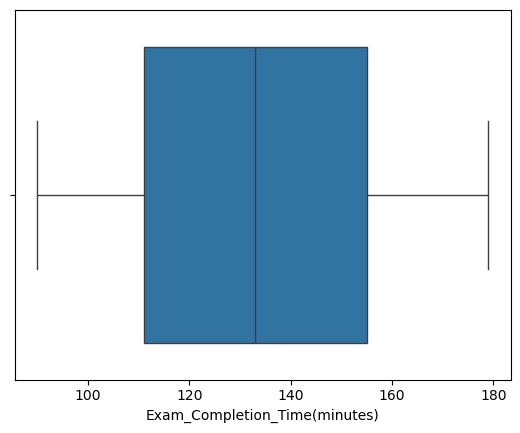

In [27]:
sns.boxplot(x = df['Exam_Completion_Time(minutes)'])

Zero outliers

<Axes: >

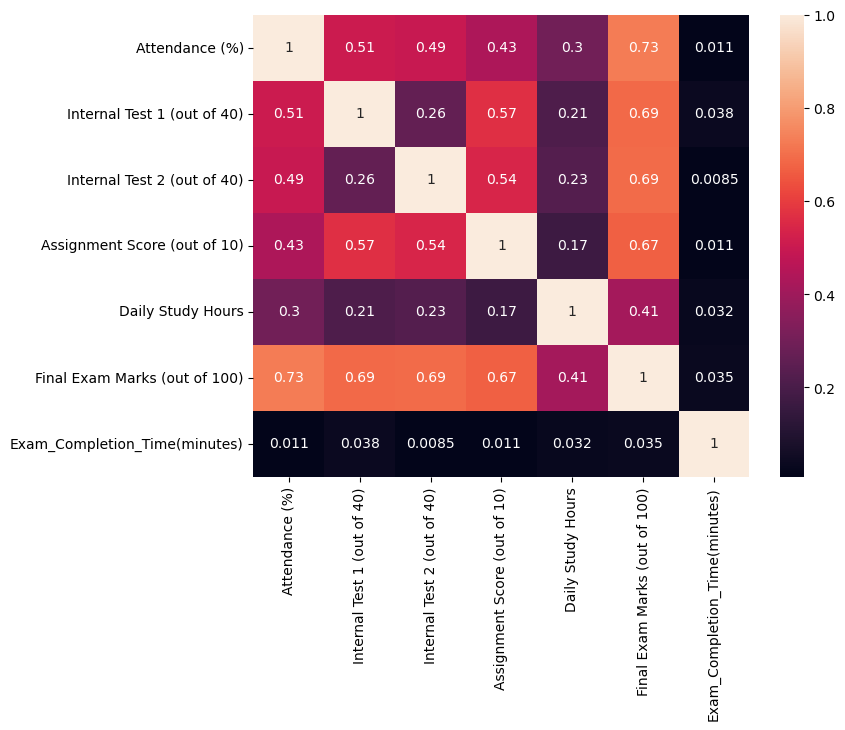

In [28]:
# Heatmap visuals shows the relationship between the one variabe to others

plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only = True),annot =True)

Conclusion

    Academic performance is strongly influenced by attendance and internal assessments.

    Exam completion time has no meaningful relationship with scores, indicating that taking more or less time does not affect results.

    Continuous evaluation metrics are more reliable predictors than behavioral timing factors.

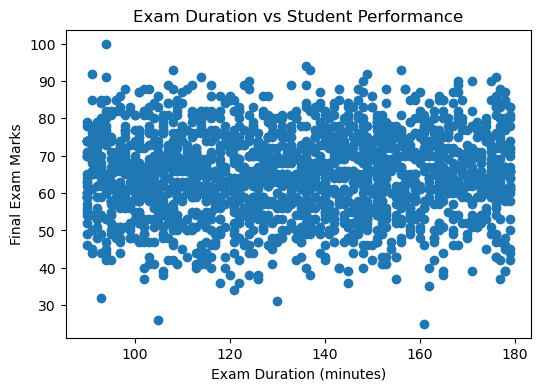

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(df['Exam_Completion_Time(minutes)'], df['Final Exam Marks (out of 100)'])

plt.xlabel("Exam Duration (minutes)")
plt.ylabel('Final Exam Marks')
plt.title("Exam Duration vs Student Performance")

plt.show()

#### There is no meaningful relationship between exam completion time and final exam performance.


Reason - 
    Taking more time does not guarantee better marks.

    Faster completion does not imply poor performance.

    Performance depends more on attendance, internal tests, and assignments, not on time spent in the exam hall.


In [30]:
from scipy.stats import pearsonr

# -----------------------------------
# Pearson Correlation Calculation
# -----------------------------------

# List of features to check against target
selected_features = [
    'Attendance (%)', 'Internal Test 1 (out of 40)','Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
    'Daily Study Hours', 'Exam_Completion_Time(minutes)'
]

correlation = {
    feature: pearsonr(df[feature], df['Final Exam Marks (out of 100)'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlation.items()),columns = ['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by = 'Pearson Correlation', ascending = False)

,Feature,Pearson Correlation
0,Attendance (%),0.725644
2,Internal Test 2 (out of 40),0.691049
1,Internal Test 1 (out of 40),0.689227
3,Assignment Score (out of 10),0.669400
4,Daily Study Hours,0.412877
5,Exam_Completion_Time(minutes),0.035280


    Attendance and internal assessments are the most impactful factors for predicting final exam marks.

    Behavioral timing factors, such as exam completion time, have no significant predictive value.

    These results align with earlier heatmap and scatter plot observations, ensuring consistency across EDA methods.

In [31]:
Q1 = df['Final Exam Marks (out of 100)'].quantile(0.25)
Q3 = df['Final Exam Marks (out of 100)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['Final Exam Marks (out of 100)'] < Q1 - 1.5*IQR) |
    (df['Final Exam Marks (out of 100)'] > Q3 + 1.5*IQR)
]

print(outliers.shape)
print('Q1 =',Q1, '& Q3 =',Q3)
print('IQR = ',IQR)

(7, 8)
Q1 = 58.0 & Q3 = 73.0
IQR =  15.0


#### lower fence and higher fence

In [32]:
lower_fence  = Q1-(1.5*IQR) 
higher_fence = Q3+(1.5*IQR)
print(lower_fence, higher_fence)

35.5 95.5


Values lying outside the lower and higher fences in a box plot are considered outliers.

In [33]:
df

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Exam_Completion_Time(minutes)
0,S1000,84,30,36,7,3,72,141
1,S1001,91,24,38,6,3,56,104
2,S1002,73,29,26,7,3,56,161
3,S1003,80,36,35,7,3,74,150
4,S1004,84,31,37,8,3,66,110
...,...,...,...,...,...,...,...,...
1995,S2995,82,31,28,6,2,52,145
1996,S2996,78,38,27,7,2,57,132
1997,S2997,78,30,33,9,2,61,139
1998,S2998,82,29,40,8,3,59,112


In [34]:
# df.to_csv("Final_student_data.csv", index=False)        # when we save csv file in the notebook folder

In [35]:
from pathlib import Path

# Current notebook path
notebook_path = Path().resolve()

# Save location - parent folder ke data subfolder me
save_path = notebook_path.parent / "dataset" / "Student_EDA_data.csv"

# Save DataFrame
df.to_csv(save_path, index=False)

print(f"Cleaned dataset saved at: {save_path}")


Cleaned dataset saved at: C:\Users\shyam\Desktop\Student exam analysis\dataset\Student_EDA_data.csv
